# What is San Francisco - Businesses EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
import datetime

import glob as glob

## Table of Contents

In [2]:
glob.glob('../data/Businesses/*.csv')

['../data/Businesses/Community_Development_Public_Service_Program_Activities_by_Neighborhood.csv',
 '../data/Businesses/Mobile_Food_Facility_Permit.csv',
 '../data/Businesses/sf_business_data_clean.csv',
 '../data/Businesses/Registered_Business_Locations_-_San_Francisco.csv',
 '../data/Businesses/Active_Business_Locations.csv',
 '../data/Businesses/Mobile_Food_Schedule.csv',
 '../data/Businesses/Registered_Business_Locations.csv',
 '../data/Businesses/Registered_Businesses_sorted_by_End_Date.csv']

## Registered Business Locations

#### Objective:
Because the end goal for this project is to understand urban planning and distribution of different businesses around San Francisco not all features will be relevent. This will help cut down features that may required more intensive processes to clean.


In [3]:
# Import Csv
registered_business_locations = pd.read_csv('../data/Businesses/Registered_Business_Locations.csv', low_memory=False)

In [ ]:
# Clean String to Datetime
registered_business_locations['Business Start Date'] = pd.to_datetime(registered_business_locations['Business Start Date'])
registered_business_locations['Business End Date'] = pd.to_datetime(registered_business_locations['Business End Date'])
registered_business_locations['Location Start Date'] = pd.to_datetime(registered_business_locations['Location Start Date'])
registered_business_locations['Location End Date'] = pd.to_datetime(registered_business_locations['Location End Date'])

# Clean Columns
registered_business_locations.columns = [x.lower().replace('-','').replace(' ','_') for x in registered_business_locations.columns]

In [4]:
registered_business_locations.head(3)

,Location Id,Business Account Number,Ownership Name,DBA Name,Street Address,City,State,Source Zipcode,Business Start Date,Business End Date,...,NAICS Code,NAICS Code Description,Parking Tax,Transient Occupancy Tax,LIC Code,LIC Code Description,Supervisor District,Neighborhoods - Analysis Boundaries,Business Corridor,Business Location
0,0183880-01-001,183880,Chaname Miriam,Chaname Miriam,3186 23rd St,San Francisco,CA,94110.0,01/01/1989,NaN,...,8100-8139,Certain Services,False,False,NaN,NaN,9.0,Mission,NaN,"3186 23RD ST\nSan Francisco, CA 94110\n(37.753..."
1,0206570-03-999,206570,Tower Jonathan Todd,Jonathan Tower Construction,6519 Eureka Ave,El+cerrito,CA,94530.0,07/13/2011,04/19/2017,...,2300-2399,Construction,False,False,NaN,NaN,NaN,NaN,NaN,"6519 EUREKA AVE\nEL CERRITO, CA 94530\n(37.906..."
2,0302158-01-001,302158,Hanke Milo F,Milo F Hanke,100 Bush St 1675,San Francisco,CA,94104.0,01/01/1997,08/16/2016,...,5210-5239,Financial Services,False,False,NaN,NaN,3.0,Financial District/South Beach,NaN,"100 BUSH ST\nSan Francisco, CA 94104\n(37.7912..."


In [6]:
registered_business_locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227466 entries, 0 to 227465
Data columns (total 26 columns):
Location Id                            227466 non-null object
Business Account Number                227466 non-null int64
Ownership Name                         227466 non-null object
DBA Name                               227466 non-null object
Street Address                         227462 non-null object
City                                   227273 non-null object
State                                  226857 non-null object
Source Zipcode                         227292 non-null float64
Business Start Date                    227466 non-null datetime64[ns]
Business End Date                      61277 non-null datetime64[ns]
Location Start Date                    227466 non-null datetime64[ns]
Location End Date                      82877 non-null datetime64[ns]
Mail Address                           166188 non-null object
Mail City                              168654 non-nul

# Total Businesses per Zipcode

In [9]:
sf_zipcodes = [94102, 94103, 94104, 94105, 94107, 94108, 94109, 94110,\
               94111, 94112, 94114, 94115, 94116, 94117, 94118, 94121,\
               94122, 94123, 94124, 94127, 94129, 94130, 94131, 94132,\
               94133, 94134, 94158]

In [10]:
# Filter by SF Zipcodes
registered_business_locations = registered_business_locations[registered_business_locations['source_zipcode'].isin(sf_zipcodes)]

In [84]:
# Groupby Zipcode
business_count_by_zipcode = registered_business_locations.groupby('source_zipcode').count()[['location_id']].reset_index().sort_values('location_id', ascending=False)
business_count_by_zipcode.columns = ['zipcode','number_of_businesses']

In [91]:
business_count_by_zipcode.head()

,zipcode,number_of_businesses
7,94110.0,15137
1,94103.0,13529
4,94107.0,12102
6,94109.0,11317
0,94102.0,9597


In [90]:
# Export csv
business_count_by_zipcode.to_csv('../data/Businesses/plot_data/businesses_by_zipcode.csv')

# Business Types per Zipcode

In [62]:
# Business types by Zipcode
business_type_by_zipcode = registered_business_locations.groupby(['source_zipcode','naics_code_description']).count()[['state']].unstack()['state']
business_type_by_zipcode

naics_code_description,Accommodations,Administrative and Support Services,"Arts, Entertainment, and Recreation",Certain Services,Construction,Financial Services,Food Services,Information,Insurance,Manufacturing,Multiple,Private Education and Health Services,"Professional, Scientific, and Technical Services",Real Estate and Rental and Leasing Services,Retail Trade,Transportation and Warehousing,Utilities,Wholesale Trade
source_zipcode,,,,,,,,,,,,,,,,,,
94102.0,326.0,166.0,340.0,239.0,125.0,83.0,696.0,158.0,9.0,44.0,153.0,544.0,1037.0,1042.0,579.0,169.0,4.0,72.0
94103.0,405.0,193.0,502.0,279.0,290.0,153.0,833.0,378.0,37.0,216.0,295.0,280.0,1337.0,1526.0,1126.0,175.0,12.0,364.0
94104.0,19.0,248.0,60.0,103.0,47.0,583.0,216.0,230.0,79.0,24.0,67.0,247.0,1667.0,583.0,175.0,20.0,1.0,51.0
94105.0,40.0,277.0,122.0,151.0,96.0,464.0,435.0,465.0,79.0,32.0,110.0,167.0,1690.0,597.0,220.0,55.0,12.0,81.0
94107.0,297.0,192.0,560.0,244.0,256.0,170.0,660.0,538.0,30.0,235.0,247.0,214.0,1642.0,956.0,545.0,149.0,13.0,221.0
94108.0,114.0,102.0,108.0,215.0,54.0,164.0,301.0,162.0,18.0,35.0,123.0,322.0,884.0,991.0,760.0,46.0,2.0,90.0
94109.0,364.0,116.0,344.0,216.0,148.0,103.0,603.0,98.0,16.0,31.0,207.0,486.0,957.0,2214.0,687.0,175.0,4.0,104.0
94110.0,905.0,165.0,862.0,270.0,477.0,121.0,1000.0,175.0,18.0,166.0,336.0,518.0,1282.0,1499.0,985.0,158.0,14.0,142.0
94111.0,44.0,223.0,90.0,153.0,105.0,924.0,380.0,247.0,114.0,46.0,84.0,169.0,1779.0,710.0,271.0,32.0,6.0,150.0


# Businesses Over Time

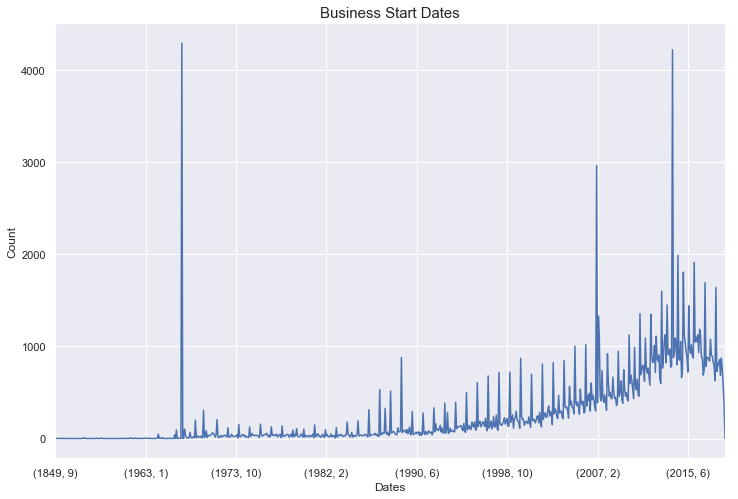

In [15]:
# Business Start Dates
business_start = registered_business_locations.groupby([registered_business_locations.business_start_date.dt.year, registered_business_locations.business_start_date.dt.month]).count()[['location_id']]

# Plot Business Start Date
_ = plt.figure(figsize=(12,8))
_ = business_start['location_id'].plot()
_ = plt.title('Business Start Dates', size=15)
_ = plt.xlabel('Dates')
_ = plt.ylabel('Count')

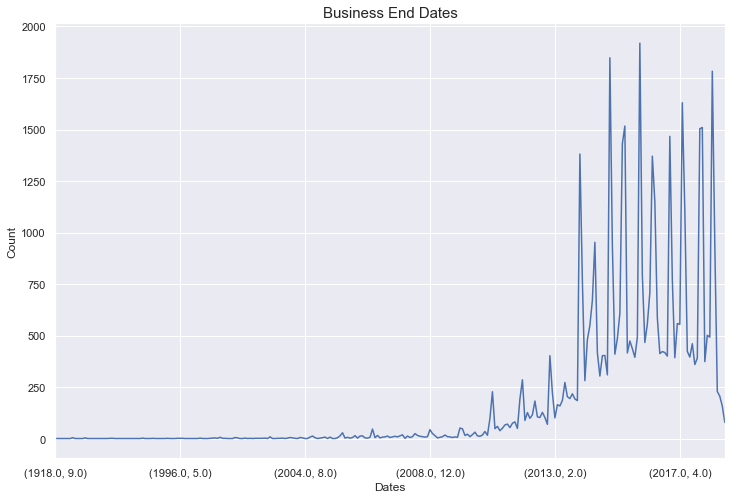

In [16]:
business_end = registered_business_locations.groupby([registered_business_locations.business_end_date.dt.year, registered_business_locations.business_end_date.dt.month]).count()[['location_id']]

# Plot Dates over Time
_ = plt.figure(figsize=(12,8))
_ = business_end['location_id'].plot()
_ = plt.title('Business End Dates', size=15)
_ = plt.xlabel('Dates')
_ = plt.ylabel('Count')

# Business Starts

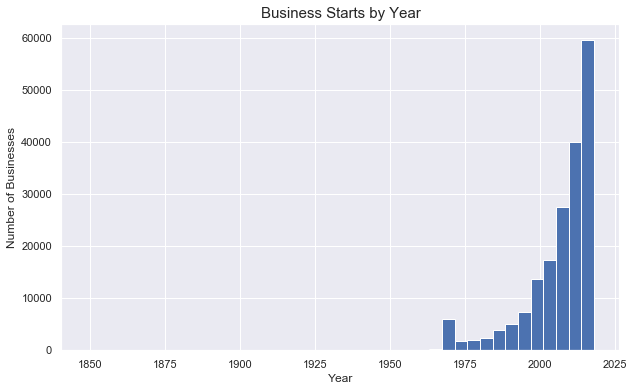

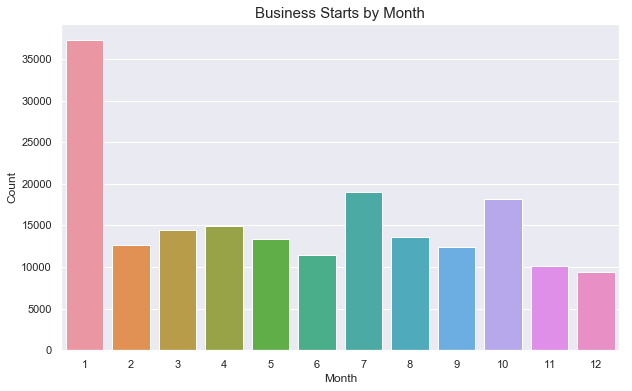

In [18]:
# Business Started by Year
_ = plt.figure(figsize=(10,6))
_ = registered_business_locations['business_start_date'].dt.year.hist(bins=40)
_ = plt.title('Business Starts by Year', size=15)
_ = plt.xlabel('Year')
_ = plt.ylabel('Number of Businesses')

# Business Started By Month
business_start_month = registered_business_locations.groupby([registered_business_locations.business_start_date.dt.month]).count()[['location_id']]
business_start_month = business_start_month.reset_index()
business_start_month.columns = ['month','count']

_ = plt.figure(figsize=(10,6))
_ = sns.barplot(x='month',y='count',data=business_start_month)
_ = plt.title('Business Starts by Month', size=15)
_ = plt.xlabel('Month')
_ = plt.ylabel('Count')

# Business Ends

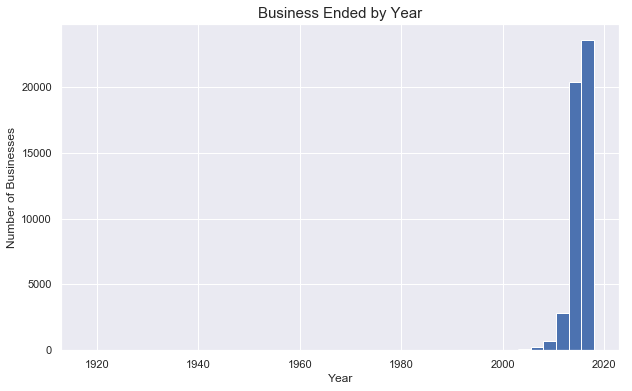

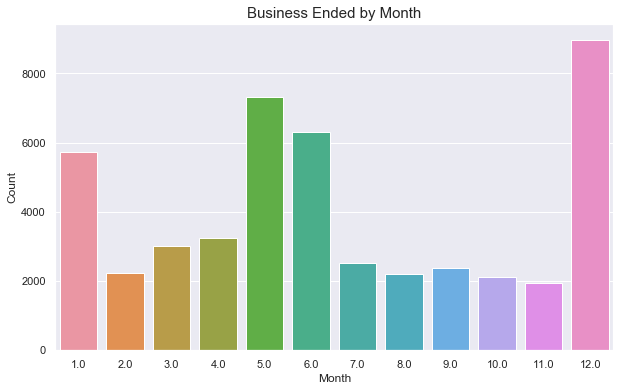

In [19]:
# Business Ended by Year
_ = plt.figure(figsize=(10,6))
_ = registered_business_locations['business_end_date'].dt.year.hist(bins=40)
_ = plt.title('Business Ended by Year', size=15)
_ = plt.xlabel('Year')
_ = plt.ylabel('Number of Businesses')

# Business Ended By Month
business_end_month = registered_business_locations.groupby([registered_business_locations.business_end_date.dt.month]).count()[['location_id']]
business_end_month = business_end_month.reset_index()
business_end_month.columns = ['month','count']

_ = plt.figure(figsize=(10,6))
_ = sns.barplot(x='month',y='count',data=business_end_month)
_ = plt.title('Business Ended by Month', size=15)
_ = plt.xlabel('Month')
_ = plt.ylabel('Count')

# Business Life Spans

In [52]:
# Copy
registered_business_locations = registered_business_locations.copy()

# Fill End Date 
registered_business_locations['business_end_date'] = registered_business_locations['business_end_date'].fillna(datetime.datetime.today())
registered_business_locations['location_end_date'] = registered_business_locations['location_end_date'].fillna(datetime.datetime.today())

# Calculate Durations Months
registered_business_locations['business_duration_m'] = abs(registered_business_locations['business_start_date'] - registered_business_locations['business_end_date'])/np.timedelta64(1, 'M')
registered_business_locations['business_duration_y'] = abs(registered_business_locations['business_start_date'] - registered_business_locations['business_end_date'])/np.timedelta64(1, 'Y')


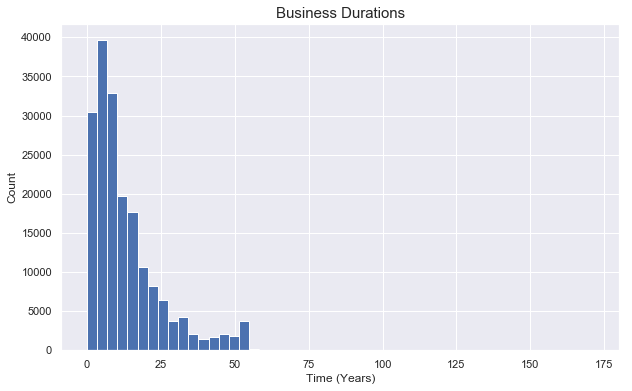

In [55]:
# Plot Histogram of Business Durations
_ = plt.figure(figsize=(10,6))
_ = plt.hist(registered_business_locations['business_duration_y'], bins=50)
_ = plt.title('Business Durations', size=15)
_ = plt.xlabel('Time (Years)')
_ = plt.ylabel('Count')

In [ ]:
# Plot Histogram of Business Durations
registered_business_locations.groupby('naics_code_description').mean().sort_values('business_duration_y', ascending=False)[['business_duration_m']]

# 
_ = plt.figure(figsize=(10,6))
_ = plt.hist(registered_business_locations['business_duration_y'], bins=50)
_ = plt.title('Business Durations', size=15)
_ = plt.xlabel('Time (Months)')
_ = plt.ylabel('Count')

In [69]:
registered_business_locations[['business_duration_y','naics_code_description']].head()

,business_duration_y,naics_code_description
0,32.221727,Certain Services
2,19.622580,Financial Services
3,19.622580,Financial Services
4,19.288555,"Professional, Scientific, and Technical Services"
5,52.474025,Construction


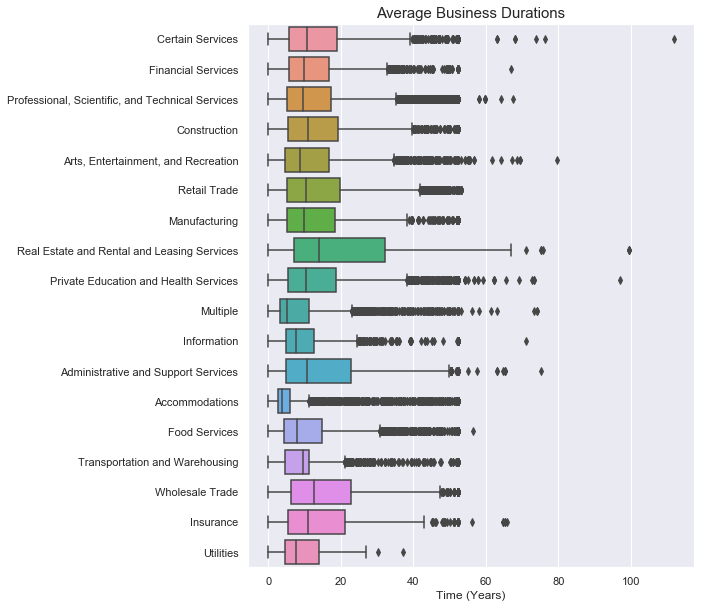

In [74]:
# Plot Average Business Durations
_ = plt.figure(figsize=(8,10))
_ = sns.boxplot(x='business_duration_y', y='naics_code_description', data=registered_business_locations)
_ = plt.title('Average Business Durations', size=15)
_ = plt.xlabel('Time (Years)')
_ = plt.ylabel('')

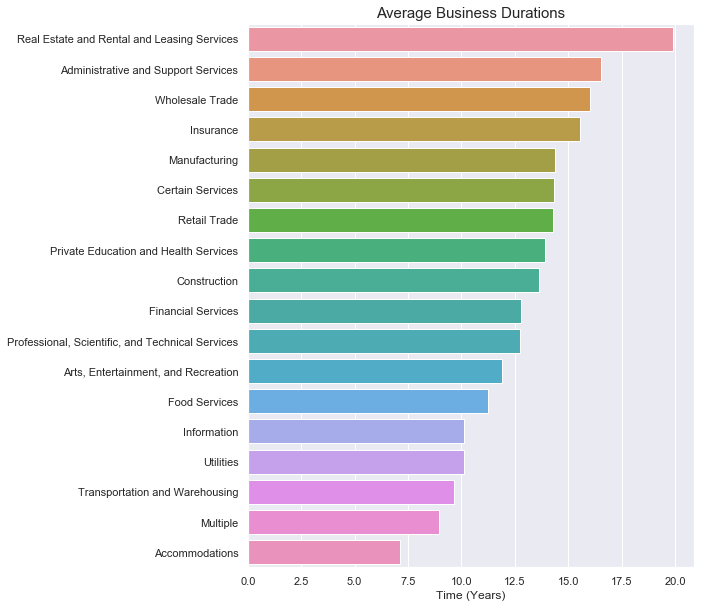

In [59]:
# 
business_df = registered_business_locations.groupby('naics_code_description').mean().sort_values('business_duration_y', ascending=False)[['business_duration_y']].reset_index()
business_df.columns = ['business_type','average_business_duration']

# Plot Average Business Durations
_ = plt.figure(figsize=(8,10))
_ = sns.barplot(x='average_business_duration', y='business_type', data=business_df)
_ = plt.title('Average Business Durations', size=15)
_ = plt.xlabel('Time (Years)')
_ = plt.ylabel('')

# Plot Average Business Durations
_ = plt.figure(figsize=(8,10))
_ = sns.boxplot(x='business_duration_y', y='naics_code_description', data=registered_business_locations)
_ = plt.title('Average Business Durations', size=15)
_ = plt.xlabel('Time (Years)')
_ = plt.ylabel('')

## Geolocations

In [92]:
registered_business_locations[['street_address','city','state','business_location']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186826 entries, 0 to 227465
Data columns (total 4 columns):
street_address       186825 non-null object
city                 186825 non-null object
state                186810 non-null object
business_location    143671 non-null object
dtypes: object(4)
memory usage: 12.1+ MB


In [93]:
registered_business_locations.iloc[0]

location_id                                                              0183880-01-001
business_account_number                                                          183880
ownership_name                                                           Chaname Miriam
dba_name                                                                 Chaname Miriam
street_address                                                             3186 23rd St
city                                                                      San Francisco
state                                                                                CA
source_zipcode                                                                    94110
business_start_date                                                 1989-01-01 00:00:00
business_end_date                                            2021-03-22 17:51:25.570606
location_start_date                                                 1989-01-01 00:00:00
location_end_date               

In [94]:
registered_business_locations[['street_address','city','state','business_location']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186826 entries, 0 to 227465
Data columns (total 4 columns):
street_address       186825 non-null object
city                 186825 non-null object
state                186810 non-null object
business_location    143671 non-null object
dtypes: object(4)
memory usage: 12.1+ MB


In [95]:
# Get locations with coordinate data
business_addresses_raw = registered_business_locations[registered_business_locations['business_location'].notnull()].copy()

# Get Coordinates from str
business_addresses_raw['coordinates'] = business_addresses_raw['business_location'].str.split('\n').apply(lambda x: x[-1])
business_addresses_raw['city_too'] = business_addresses_raw['business_location'].str.split('\n').apply(lambda x: x[0]).str.lower()

# Clean to addresses with coordinates
business_addresses_pre = business_addresses_raw[business_addresses_raw['coordinates'].str.contains('\(')].copy()

# Str to List
business_addresses_pre['coordinates'] = business_addresses_pre['coordinates'].str.replace('(','').str.replace(')','').str.split(', ')

# Coordinate List to lat lon
business_addresses_pre['lat'] = business_addresses_pre['coordinates'].apply(lambda x: x[0])
business_addresses_pre['lon'] = business_addresses_pre['coordinates'].apply(lambda x: x[1])

In [96]:
# Merge coordinate list 
registered_business_locations = registered_business_locations.merge(business_addresses_pre[['business_location','city_too','coordinates','lat','lon']], how='left')

In [97]:
registered_business_locations[['neighborhoods__analysis_boundaries','lat','lon']].head()

,neighborhoods__analysis_boundaries,lat,lon
0,Mission,37.753989,-122.416147
1,Financial District/South Beach,37.79128,-122.39995
2,Financial District/South Beach,37.79128,-122.39995
3,Financial District/South Beach,37.79128,-122.39995
4,Financial District/South Beach,37.79128,-122.39995


In [98]:
registered_business_locations[registered_business_locations['business_location'].isnull()][['street_address','city','state','business_location']]

,street_address,city,state,business_location
274,2229 Balboa St,San Francisco,CA,NaN
275,2 Townsend St 2-1102,San Francisco,CA,NaN
276,1330 Kobbe Ave,San Francisco,CA,NaN
277,795 Folsom St,San Francisco,CA,NaN
278,225 Velasco Ave,San Francisco,CA,NaN
285,23rd St,San+francisco,CA,NaN
291,582 Market St Ste 1111,San Francisco,CA,NaN
292,44 Fredson Ct,San Francisco,CA,NaN
293,981 Mission St,San Francisco,CA,NaN
294,601 4th St 317,San Francisco,CA,NaN


In [ ]:
registered_business_locations['street_address']

In [ ]:
registered_business_locations[registered_business_locations['business_location'].notnull()][['street_address','business_location']]

In [ ]:
registered_business_locations.info()

In [ ]:
# Fix City 
registered_business_locations['city'] = 'San Francisco'

# Combine Address pieces for full address
registered_business_locations['full_address'] = registered_business_locations['street_address'] + ', ' + registered_business_locations['city'] + ', ' + registered_business_locations['state']

In [ ]:
import requests
import json
import time


def search_by_address(query):

    query = "+".join(query.split(" "))

    query_url = "https://maps.googleapis.com/maps/api/place/textsearch/json?query=" + query + "&key=" + api_key

    page1 = requests.get(query_url)
    json1 = json.loads(page1.content)

    return json1['results']

def address_to_latlon(address):
    
    query = "+".join(address.split(" "))

    query_url = "https://maps.googleapis.com/maps/api/place/textsearch/json?query=" + query + "&key=" + api_key

    page1 = requests.get(query_url)
    json1 = json.loads(page1.content)
    
    latlon = json1['results'][0]['geometry']['location'].values()

    return latlon
    

In [ ]:
# Reset index
registered_business_locations = registered_business_locations.reset_index(drop = 1)

In [258]:
registered_business_locations['full_address'][2]

'100 Bush St #1675, San Francisco, CA'

In [257]:
search_by_address(registered_business_locations['full_address'][2])

[]

In [251]:
registered_business_locations.head()['full_address'].apply(lambda x : search_by_address(x))

IndexError: list index out of range

# By Category

In [162]:
# Get full dataset where business type is not null
business_by_categories = registered_business_locations[registered_business_locations['naics_code_description'].notnull()]

In [164]:
business_by_categories.iloc[0]

location_id                                                              0183880-01-001
business_account_number                                                          183880
ownership_name                                                           Chaname Miriam
dba_name                                                                 Chaname Miriam
street_address                                                             3186 23rd St
city                                                                      San Francisco
state                                                                                CA
source_zipcode                                                                    94110
business_start_date                                                 1989-01-01 00:00:00
business_end_date                                                                   NaT
location_start_date                                                 1989-01-01 00:00:00
location_end_date               

In [165]:
business_by_categories['naics_code_description'].value_counts()

Real Estate and Rental and Leasing Services         22968
Professional, Scientific, and Technical Services    20120
Retail Trade                                        11103
Food Services                                        9719
Private Education and Health Services                6851
Arts, Entertainment, and Recreation                  6317
Accommodations                                       6223
Construction                                         6130
Financial Services                                   3765
Multiple                                             3591
Certain Services                                     3532
Information                                          3297
Transportation and Warehousing                       3014
Administrative and Support Services                  2786
Wholesale Trade                                      2616
Manufacturing                                        1566
Insurance                                             621
Utilities     